# Expression of diabetes DE genes validated with antibodies

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from collections import defaultdict

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
path_data='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/combined/'

In [3]:
# Saving figures
path_fig='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/figures/paper/'
sc._settings.ScanpyConfig.figdir=Path(path_fig)

In [4]:
adata_rn_b=sc.read(path_data+'data_rawnorm_integrated_analysed_beta_v1s1_sfintegrated.h5ad')
adata_rn_b.shape

(102143, 30672)

Prepare healthy-diseased categories per dataset with diabetes model

In [5]:
# T1D and T2D (untreated) samples by diabetes model vs healthy controls from same studies
diseased_category={
 'NOD_elimination_SRR7610300_14w':'NOD',
 'NOD_elimination_SRR7610299_14w':'NOD',
 'NOD_elimination_SRR7610298_14w':'NOD',
 'NOD_elimination_SRR7610303_16w':'NOD',
 'NOD_elimination_SRR7610301_16w':'NOD',
 'NOD_elimination_SRR7610302_16w':'NOD',
 'NOD_elimination_SRR7610295_8w':'healthy control (NOD)',
 'NOD_elimination_SRR7610296_8w':'healthy control (NOD)',
 'NOD_elimination_SRR7610297_8w':'healthy control (NOD)',
 'VSG_MUC13633_chow_WT':'healthy control (db/db)',
 'VSG_MUC13634_chow_WT':'healthy control (db/db)',
 'VSG_MUC13641_sham_Lepr-/-':'db/db',
 'VSG_MUC13639_sham_Lepr-/-':'db/db',
 'STZ_G2_STZ':'mSTZ',
 'STZ_G1_control':'healthy control (mSTZ)'}
diseased_order_colors={'healthy control (mSTZ)':'#0CA9BD',
                       'healthy control (db/db)':'#0B2E79',
                       'healthy control (NOD)':'#8BBD0C',
                       'mSTZ':'#FFCC57',
                       'db/db':'#C72323',
                       'NOD':'#8D29A4'}
adata_rn_b_sub=adata_rn_b[np.argwhere(adata_rn_b.obs.study_sample_design.isin(
    diseased_category.keys()).values).ravel(),:].copy()
adata_rn_b_sub.obs['diseased_group']=pd.Categorical(
    adata_rn_b_sub.obs.study_sample_design.map(diseased_category),
    categories=diseased_order_colors.keys(),ordered=True)
# Add colors so that PAGA recognises them
adata_rn_b_sub.uns['diseased_group_colors']=[diseased_order_colors[c] for c in  
                                             adata_rn_b_sub.obs['diseased_group'].cat.categories]

In [6]:
 # reorder categories
adata_rn_b_sub.obs['diseased_group']=pd.Categorical(
adata_rn_b_sub.obs.study_sample_design.map(diseased_category),
categories=['healthy control (NOD)','NOD',
            'healthy control (mSTZ)','mSTZ',
            'healthy control (db/db)','db/db']
    ,ordered=True)

Plot expression of genes measured on protein level with antibodies

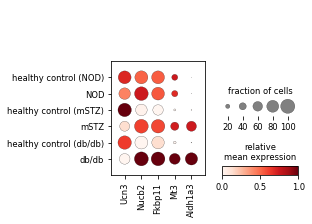

In [8]:
# Dotplot of genes
sc.pl.dotplot(adata_rn_b_sub, 
              var_names=['Ucn3','Nucb2','Fkbp11','Mt3','Aldh1a3'],
              gene_symbols='gene_symbol',use_raw=False,
              groupby='diseased_group',
              standard_scale='var',show=False,
              size_title='fraction of cells',
              colorbar_title='relative\nmean expression',)
plt.savefig(path_fig+'dotplot_beta_AbMarkers_diabetes.png',dpi=300,bbox_inches='tight')